In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer=load_breast_cancer()


In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data=scaler.transform(df)

In [12]:
from sklearn.decomposition import PCA


In [13]:
pca=PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pa=pca.transform(scaled_data)

In [16]:
scaled_data.shape

(569, 30)

In [17]:
x_pa.shape

(569, 2)

In [18]:
x_pa

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second Principal Component')

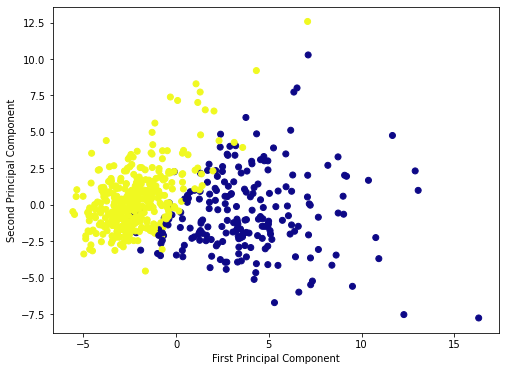

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x_pa[:,0],x_pa[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [20]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [21]:
df_comp=pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

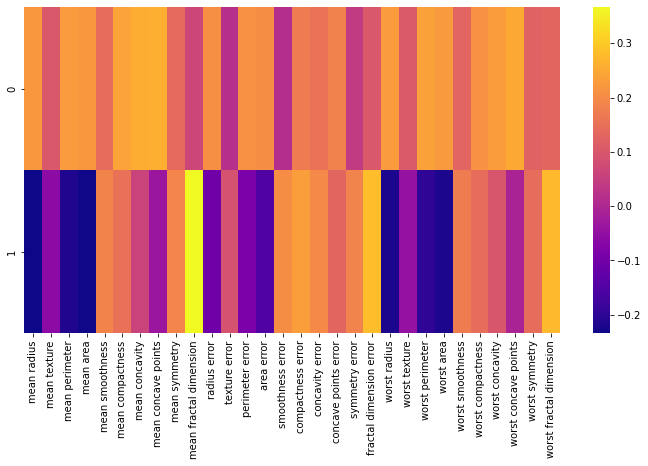

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

# Checking Accuracy with and without PCA 

# With PCA 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df1=pd.read_csv('hour.csv')
df1.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [25]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [26]:
features=['instant','season','yr','mnth','hr','holiday','weekday',
         'workingday','weathersit','temp','atemp','hum','windspeed',
         'casual','registered']

In [27]:
x=df1[features]
y=df1['cnt']

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)

In [30]:
pca.fit(x)

PCA(n_components=2)

In [31]:
x_pca=pca.transform(x)

In [32]:
x.shape

(17379, 15)

In [33]:
y.shape

(17379,)

Text(0, 0.5, 'Second Principal Component')

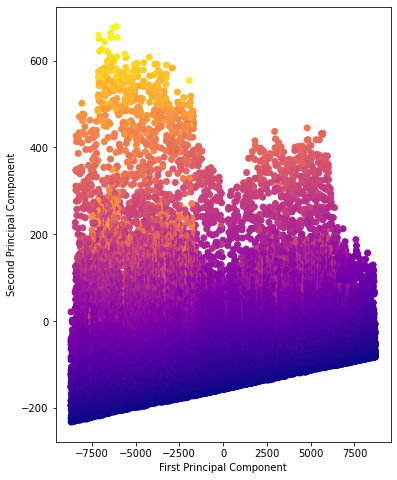

In [34]:
plt.figure(figsize=(6,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['cnt'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [35]:
pca.components_

array([[-9.99962462e-01, -8.91457814e-05, -8.63058016e-05,
        -3.35267683e-04,  6.44104507e-06, -4.90136280e-07,
        -5.44802954e-07,  3.14052205e-07,  1.81335882e-06,
        -5.22957083e-06, -4.71640115e-06, -3.65324612e-07,
         1.81603969e-06, -1.55690799e-03, -8.51598339e-03],
       [-8.65533442e-03,  4.81825594e-04,  3.27517355e-05,
        -3.85749428e-04,  1.86914926e-02, -5.71359272e-05,
         3.17767875e-04,  3.76395140e-04, -5.51612756e-04,
         4.26165406e-04,  3.76156991e-04, -3.93413165e-04,
         9.18552344e-05,  1.75561214e-01,  9.84252282e-01]])

In [36]:
df_comp=pd.DataFrame(pca.components_,columns=['instant','season','yr','mnth','hr','holiday','weekday',
                                             'workingday','weathersit','temp','atemp','hum','windsped','casual','registered'])
df_comp

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windsped,casual,registered
0,-0.999962,-0.000089,-0.000086,-0.000335,0.000006,-4.901363e-07,-5.448030e-07,3.140522e-07,0.000002,-0.000005,-0.000005,-3.653246e-07,0.000002,-0.001557,-0.008516
1,-0.008655,0.000482,0.000033,-0.000386,0.018691,-5.713593e-05,3.177679e-04,3.763951e-04,-0.000552,0.000426,0.000376,-3.934132e-04,0.000092,0.175561,0.984252


<AxesSubplot:>

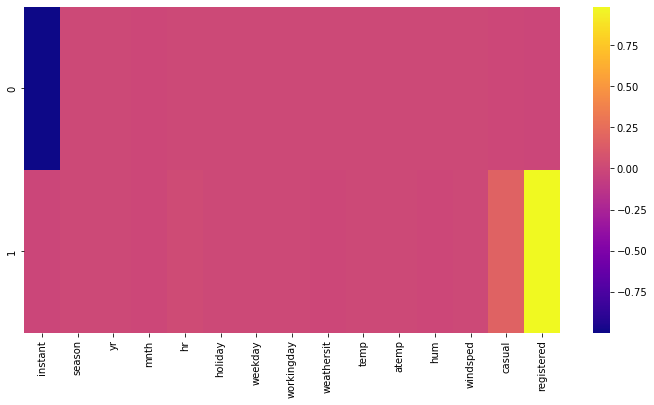

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2)


In [ ]:
svclassifier=SVC(kernel='linear')
clf=svclassifier.fit(x_train,y_train)


In [ ]:
pred=svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Without PCA 

In [ ]:
df1=pd.read_csv('hour.csv')
df1.head(2)

In [ ]:
features=['instant','season','yr','mnth','hr','holiday','weekday','workingday','weathersit',
         'temp','atemp','hum','windspeed','causual','registered']

In [ ]:
x=df1[features]
y=df1['cnt']

In [ ]:
x_trian,x_test,y_train,y_test=trian_test_split(x,y,test_size=0.2)

In [ ]:
svclassifier=SVC(kernel='linear')
clf=svclassifier.fit(x_train,y_train)

In [ ]:
pred=svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(confusion_matrix(y_test,pred))